In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
#read the CSV file into a dataframe. 
df= pd.read_csv('pG_savitski_no_remap.csv')

#select the column you want to keep
columns_to_keep = ['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df)
new_df.to_csv('ProteinIDs_savitski_no_remapwithScore.csv', index= False)

                        Protein IDs   Q-value      Score
0              sp|P35527|K1C9_HUMAN  0.000535  18.661526
1              sp|P35908|K22E_HUMAN  0.000535  17.132790
2             sp|P67809|YBOX1_HUMAN  0.000535  16.793147
3             sp|P09972|ALDOC_HUMAN  0.000535  16.784376
4             sp|P14550|AK1A1_HUMAN  0.000535  15.734628
...                             ...       ...        ...
38260          sp|P56748|CLD8_HUMAN  0.904724   0.000000
38261         sp|Q9Y6X1|SERP1_HUMAN  0.904724   0.000000
38262    REV__sp|P60321|NANO2_HUMAN  0.904774   0.000000
38263  REV__sp|Q9NVA2-2|SEP11_HUMAN  0.904778   0.000000
38264        sp|Q9NTG7-2|SIR3_HUMAN  0.904778   0.000000

[38265 rows x 3 columns]


In [7]:
df = pd.read_csv('ProteinIDs_savitski_no_remap.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_savitski_no_remap.csv')

        Q-value Protein Type Protein Uniprot Protein Label
0      0.000535           sp          P35527    K1C9_HUMAN
1      0.000535           sp          P35908    K22E_HUMAN
2      0.000535           sp          P67809   YBOX1_HUMAN
3      0.000535           sp          P09972   ALDOC_HUMAN
4      0.000535           sp          P14550   AK1A1_HUMAN
...         ...          ...             ...           ...
38260  0.904724           sp          P56748    CLD8_HUMAN
38261  0.904724           sp          Q9Y6X1   SERP1_HUMAN
38262  0.904774      REV__sp          P60321   NANO2_HUMAN
38263  0.904778      REV__sp        Q9NVA2-2   SEP11_HUMAN
38264  0.904778           sp        Q9NTG7-2    SIR3_HUMAN

[38265 rows x 4 columns]


sp         14690
REV__sp    12743
REV__sR     2714
sR          2665
REV__pI     2123
pI          2105
sU           441
REV__sU      427
nC           188
REV__nC      169
Name: Protein Type, dtype: int64


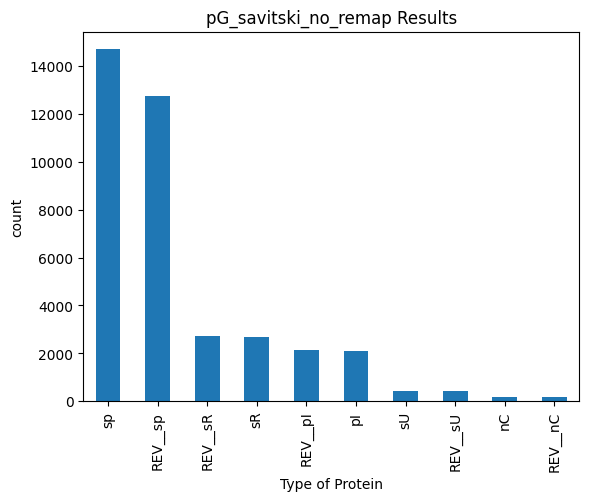

In [8]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_savitski_no_remap.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_savitski_no_remap Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()
          

Protein Type
REV__pI       2
REV__sR       1
REV__sp      33
sR            1
sp         3765
Name: Protein Type, dtype: int64


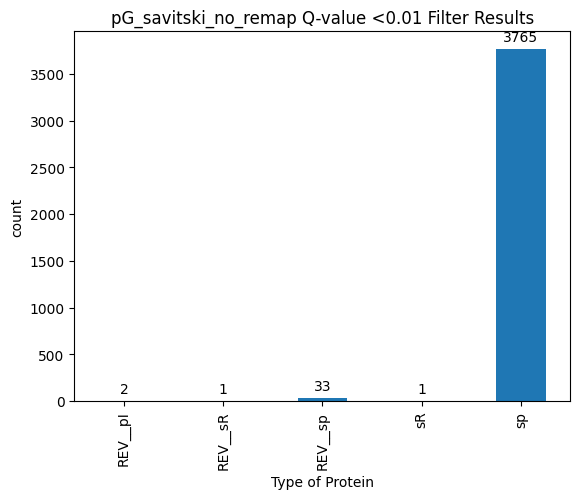

In [39]:
df = pd.read_csv('SeparateProteinIDs_savitski_no_remap.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_savitski_no_remap Q-value <0.01 Filter Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          

In [14]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI       2
REV__sR       1
REV__sp      33
sR            1
sp         3765
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      169
REV__pI     2121
REV__sR     2713
REV__sU      427
REV__sp    12710
nC           188
pI          2105
sR          2664
sU           441
sp         10925
Name: Protein Type, dtype: int64


# Q-value filter CutOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27681/1740901593.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27681/1740901593.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp'

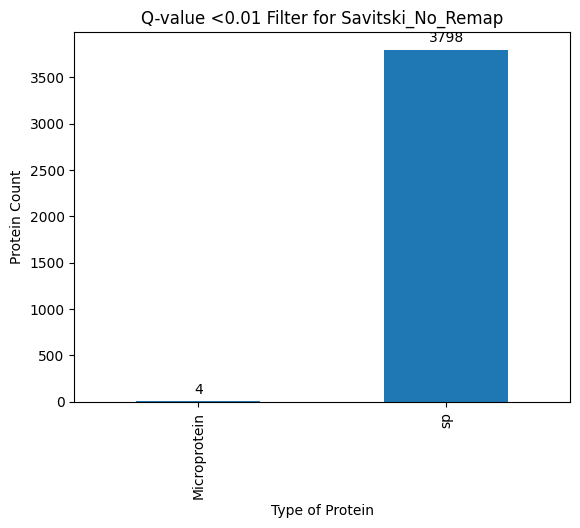

In [35]:
# read in the CSV file with the separated protein IDs
df = pd.read_csv('SeparateProteinIDs_savitski_no_remap.csv')

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Savitski_No_Remap')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# NO Q-value filter

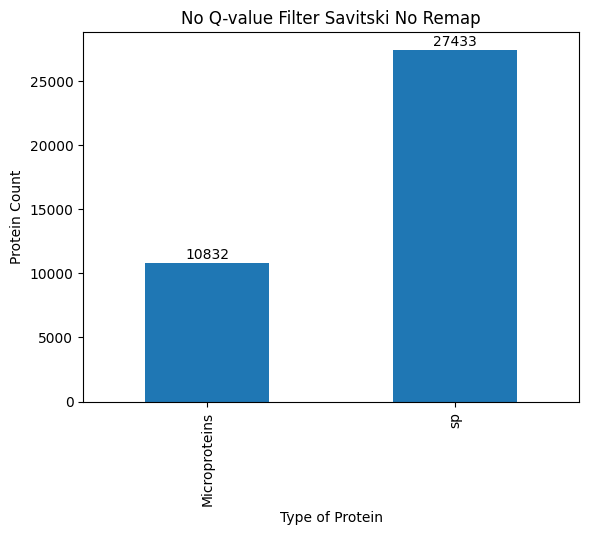

In [37]:
# read in the CSV file with the separated protein IDs
df = pd.read_csv('SeparateProteinIDs_savitski_no_remap.csv')

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Savitski No Remap')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# extra analysis 